In [1]:
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=100, noise=0.25, random_state=3)

In [2]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)

In [3]:
from sklearn.ensemble import RandomForestClassifier

# 랜덤포레스트 모형 6개, 계산방식은 엔트로피
forest = RandomForestClassifier(n_estimators=6, random_state=2, criterion='entropy')
forest.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=6, random_state=2)

In [4]:
print("학습용: ",forest.score(X_train,y_train))
print("검증용: ",forest.score(X_test,y_test))

학습용:  0.96
검증용:  0.92


In [5]:
import numpy as np

idx=0
result=[]

#forest.estimators_ 보면 위에 만든 6개의 랜덤포레스트 트리를 볼 수 있음
for f in forest.estimators_:
    result.append(f.score(X_test, y_test))
    idx+=1

print(result)
print(max(result))
print(np.argmax(result)) # 최대값의 인덱스

[0.84, 0.88, 0.8, 0.92, 0.88, 0.8]
0.92
3


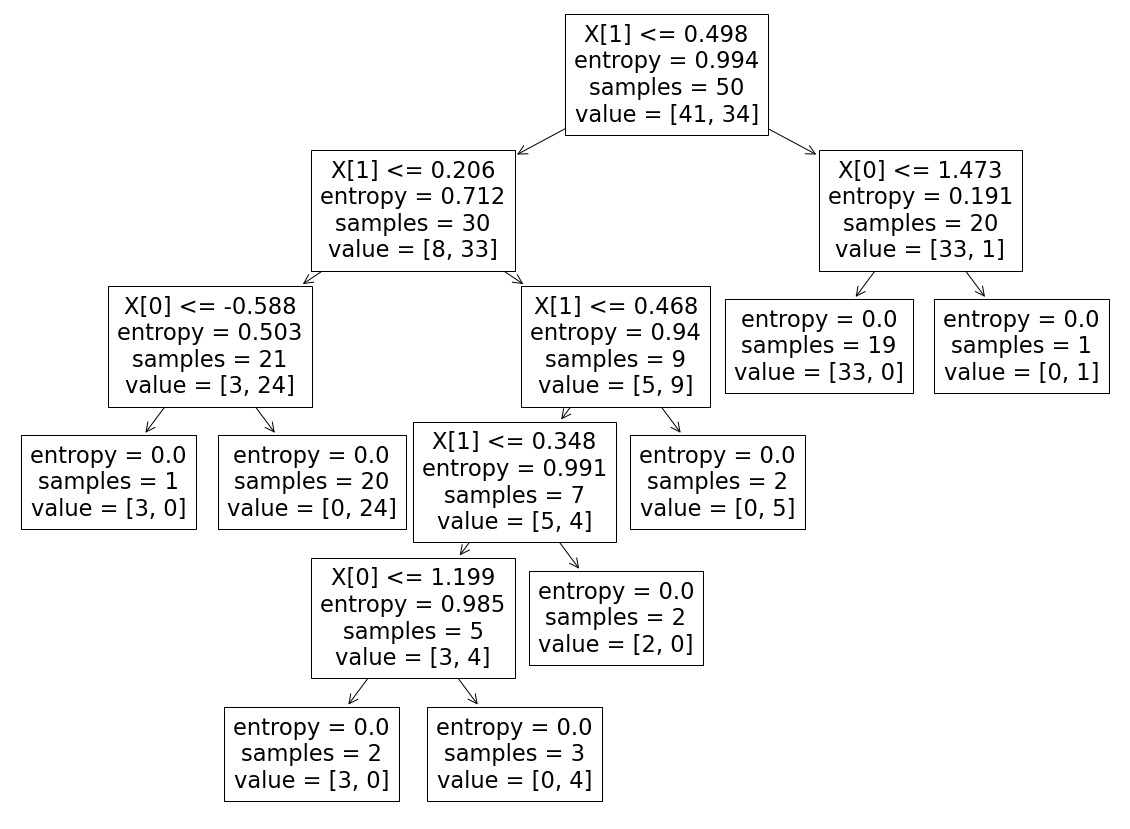

In [11]:
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn import tree

plt.figure(figsize=(20,15))
tree.plot_tree(forest.estimators_[3]) # forest.estimators_는 리스트이기 때문에 [3]을 붙여서 리스트 속 인덱스를 명시해줘야 함
plt.show()

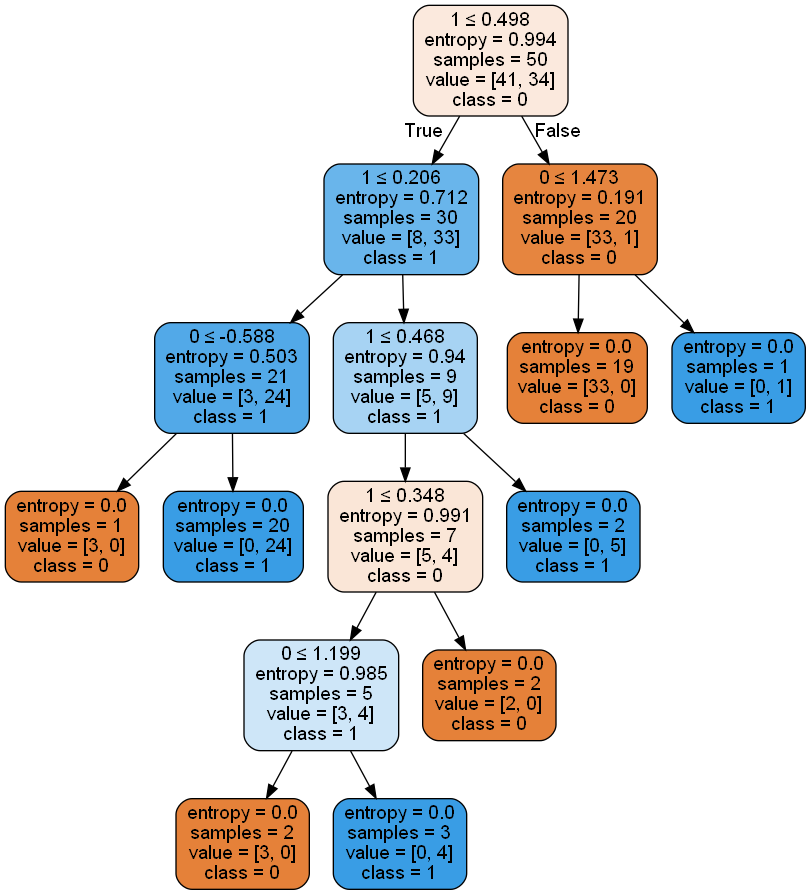

In [7]:
from sklearn.tree import export_graphviz
import pydotplus
import graphviz
from IPython.display import Image

dot_data = export_graphviz(forest.estimators_[3], out_file=None, feature_names=[0,1],class_names=['0','1'],filled=True,rounded=True,special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

In [8]:
x = np.arange(12).reshape(3,4)
np.ravel(x) # 다차원 배열을 1차열로 바꿔줌. reshape()의 반대 역할인 셈

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11])

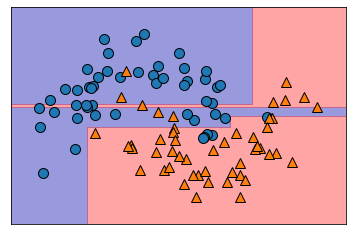

In [9]:
import mglearn

mglearn.plots.plot_2d_separator(forest.estimators_[3], X, fill=True, alpha=0.4)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)

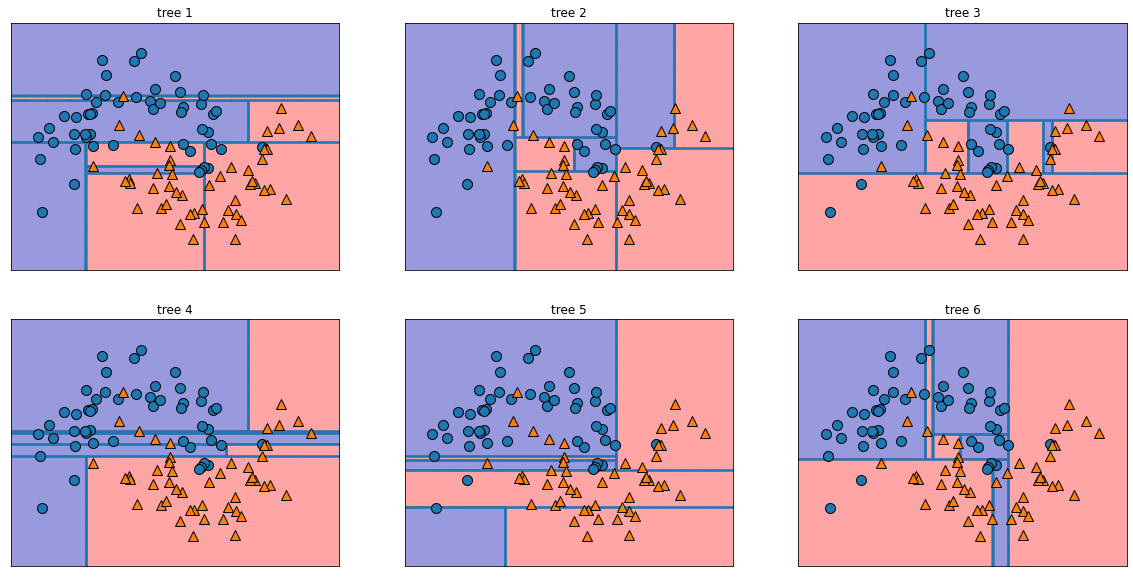

In [10]:
fig, axes = plt.subplots(2,3,figsize=(20,10)) # 2행 3열의 서브플롯 생성
for i, (ax, tree) in enumerate(zip(axes.ravel(), forest.estimators_)):
    ax.set_title(f'tree {i+1}')
    mglearn.plots.plot_tree_partition(X, y, tree, ax=ax)

In [ ]:
# 랜덤포레스트(mushrooms)

In [20]:
import pandas as pd

df = pd.read_csv("c:/data/mushroom/mushrooms.csv")

In [21]:
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [22]:
from sklearn.preprocessing import LabelEncoder

lbl = LabelEncoder()
for col in df.columns:
    df[col] = lbl.fit_transform(df[col])
    print(lbl.classes_)

['e' 'p']
['b' 'c' 'f' 'k' 's' 'x']
['f' 'g' 's' 'y']
['b' 'c' 'e' 'g' 'n' 'p' 'r' 'u' 'w' 'y']
['f' 't']
['a' 'c' 'f' 'l' 'm' 'n' 'p' 's' 'y']
['a' 'f']
['c' 'w']
['b' 'n']
['b' 'e' 'g' 'h' 'k' 'n' 'o' 'p' 'r' 'u' 'w' 'y']
['e' 't']
['?' 'b' 'c' 'e' 'r']
['f' 'k' 's' 'y']
['f' 'k' 's' 'y']
['b' 'c' 'e' 'g' 'n' 'o' 'p' 'w' 'y']
['b' 'c' 'e' 'g' 'n' 'o' 'p' 'w' 'y']
['p']
['n' 'o' 'w' 'y']
['n' 'o' 't']
['e' 'f' 'l' 'n' 'p']
['b' 'h' 'k' 'n' 'o' 'r' 'u' 'w' 'y']
['a' 'c' 'n' 's' 'v' 'y']
['d' 'g' 'l' 'm' 'p' 'u' 'w']


In [23]:
X = df.iloc[:, 1:]
y = df['class']
df['class'].value_counts()

0    4208
1    3916
Name: class, dtype: int64

In [24]:
from imblearn.under_sampling import RandomUnderSampler

X_sample, y_sample = RandomUnderSampler(random_state=0).fit_resample(X,y)
X_samp = pd.DataFrame(data=X_sample,columns=X.columns)
X_samp = pd.get_dummies(X_samp,columns=X_samp.columns,drop_first=True) # 원핫인코딩
y_samp = pd.DataFrame(data=y_sample,columns=['class'])

df_samp = pd.concat([X_samp,y_samp],axis=1)
df_samp['class'].value_counts()

0    3916
1    3916
Name: class, dtype: int64

In [25]:
X = df_samp.iloc[:,:-1]
y = df_samp['class']

In [26]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=0)

In [27]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()
model.fit(X_train, y_train)

RandomForestClassifier()

In [28]:
from sklearn.metrics import accuracy_score, classification_report

pred = model.predict(X_test)
score = accuracy_score(y_test, pred)
report = classification_report(y_test, pred)
print("정답률: ",score)
print("리포트: \n",report)

정답률:  1.0
리포트: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       979
           1       1.00      1.00      1.00       979

    accuracy                           1.00      1958
   macro avg       1.00      1.00      1.00      1958
weighted avg       1.00      1.00      1.00      1958



In [29]:
from sklearn.metrics import precision_score, recall_score, f1_score

print(precision_score(y_test,pred))
print(recall_score(y_test,pred))
print(f1_score(y_test,pred))

1.0
1.0
1.0


In [ ]:
# 78페이지로 넘어가~~~

In [ ]:
# 트리모형의 교차검증

In [36]:
df = pd.read_csv("c:/data/iris/iris_n.csv")
df.head()

,SepalLength,SepalWidth,PetalLength,PetalWidth,Name,Species
0,5.1,3.5,1.4,0.2,setosa,0
1,4.9,3.0,1.4,0.2,setosa,0
2,4.7,3.2,1.3,0.2,setosa,0
3,4.6,3.1,1.5,0.2,setosa,0
4,5.0,3.6,1.4,0.2,setosa,0


In [37]:
X = df[df.columns[:-2]]
y = df["Species"]

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

In [39]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(random_state=0)
model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=0)

In [40]:
model.score(X_train, y_train)

1.0

In [41]:
model.score(X_test, y_test)

0.9666666666666667

In [42]:
from sklearn.model_selection import GridSearchCV

params = {
    'max_depth' : list(range(1,11)),
    'criterion' : ['gini', 'entropy'],
    'max_leaf_nodes' : list(range(2,11)),
    'min_samples_split' : [2,3,4]
}
gcv = GridSearchCV(model, params, cv=3)
gcv.fit(X,y)

GridSearchCV(cv=3, estimator=DecisionTreeClassifier(random_state=0),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'max_leaf_nodes': [2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'min_samples_split': [2, 3, 4]})

In [43]:
gcv.cv_results_["params"][:5]

[{'criterion': 'gini',
  'max_depth': 1,
  'max_leaf_nodes': 2,
  'min_samples_split': 2},
 {'criterion': 'gini',
  'max_depth': 1,
  'max_leaf_nodes': 2,
  'min_samples_split': 3},
 {'criterion': 'gini',
  'max_depth': 1,
  'max_leaf_nodes': 2,
  'min_samples_split': 4},
 {'criterion': 'gini',
  'max_depth': 1,
  'max_leaf_nodes': 3,
  'min_samples_split': 2},
 {'criterion': 'gini',
  'max_depth': 1,
  'max_leaf_nodes': 3,
  'min_samples_split': 3}]

In [44]:
scores = gcv.cv_results_["mean_test_score"]
scores[:10]

array([0.66, 0.66, 0.66, 0.66, 0.66, 0.66, 0.66, 0.66, 0.66, 0.66])

0.9733333333333333


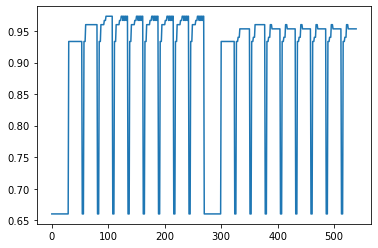

In [45]:
%matplotlib inline
import matplotlib.pyplot as plt

print(max(scores))
plt.plot(scores)

In [46]:
print(gcv.best_score_)
print(gcv.best_params_)
print(gcv.best_estimator_)

0.9733333333333333
{'criterion': 'gini', 'max_depth': 4, 'max_leaf_nodes': 7, 'min_samples_split': 2}
DecisionTreeClassifier(max_depth=4, max_leaf_nodes=7, random_state=0)


In [47]:
from sklearn.model_selection import cross_val_score
import numpy as np

tree = DecisionTreeClassifier(criterion='gini', max_depth=4, max_leaf_nodes=6, min_samples_split=2, random_state=0)
result = cross_val_score(tree,X,y,cv=10)
print(result)
print(np.mean(result))

[1.         0.93333333 1.         0.93333333 0.93333333 0.86666667
 0.93333333 1.         1.         1.        ]
0.96


In [ ]:
# 트리 모형의 교차검증2

In [1]:
from sklearn.datasets import load_iris

data = load_iris()
X = data.data[:, 2:]
y = data.target

feature_names = data.feature_names[2:]

In [2]:
import os
%matplotlib inline
import io
from sklearn import tree
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import graphviz
from IPython.display import Image, display
import pydotplus

In [13]:
def draw_decision_tree(model):
    dot_data = tree.export_graphviz(model, out_file=None, feature_names=feature_names, filled=True, rounded=True, special_characters=True)
    graph = pydotplus.graph_from_dot_data(dot_data)
    return Image(graph.create_png())

def plot_decision_regions(X, y, model, title):
    resolution = 0.01
    markers = ('s', '^', 'o')
    colors = ('red', 'blue', 'lightgreen')
    cmap = mpl.colors.ListedColormap(colors)

    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution), np.arange(x2_min, x2_max, resolution))
    Z = model.predict(np.array([xx1.ravel(), xx2.ravel()]).T).reshape(xx1.shape)
    plt.contour(xx1, xx2, Z, colors='k')
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1], alpha=0.8, c=[cmap(idx)], marker=markers[idx], s=80, label=cl)
    plt.xlabel(data.feature_names[2])
    plt.ylabel(data.feature_names[3])
    plt.legend(loc='upper left')
    plt.show()

    return Z

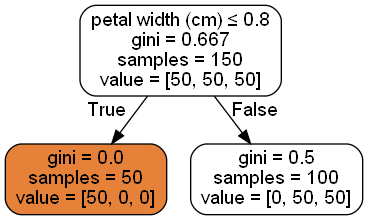

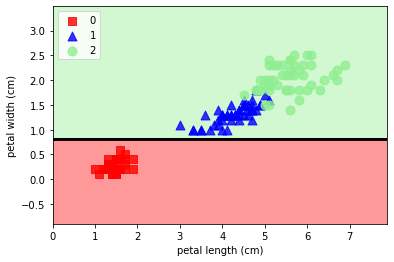

[[50  0  0]
 [ 0 50  0]
 [ 0 50  0]]


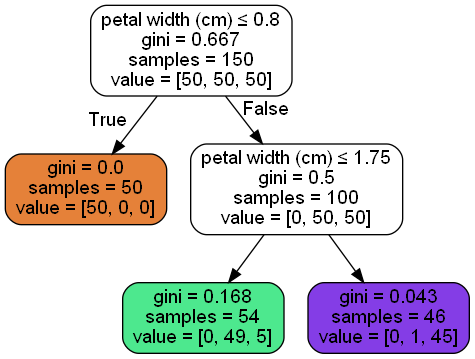

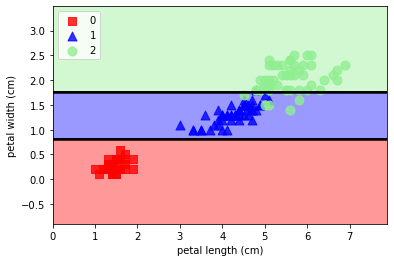

[[50  0  0]
 [ 0 49  1]
 [ 0  5 45]]


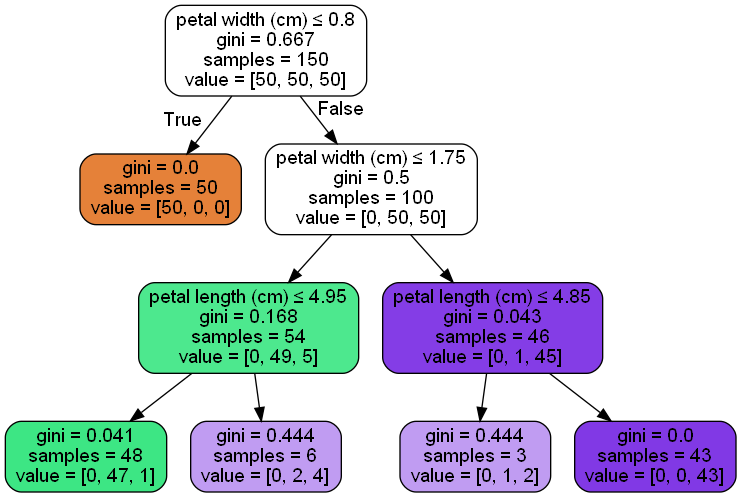

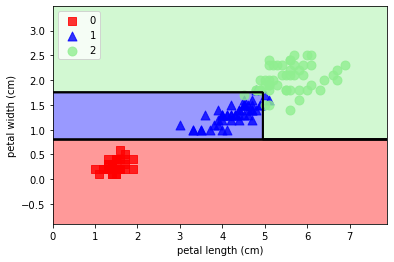

[[50  0  0]
 [ 0 47  3]
 [ 0  1 49]]


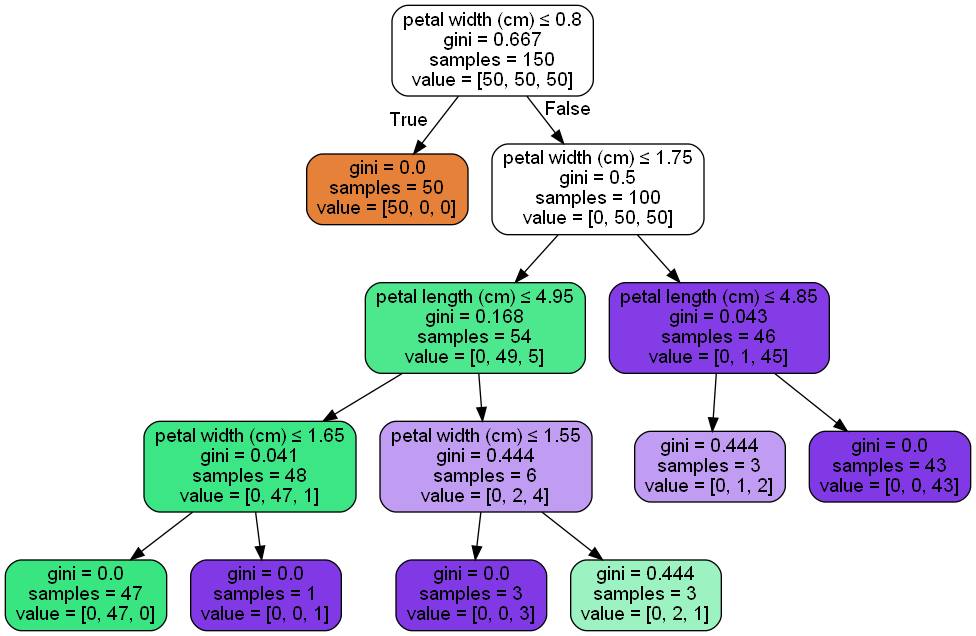

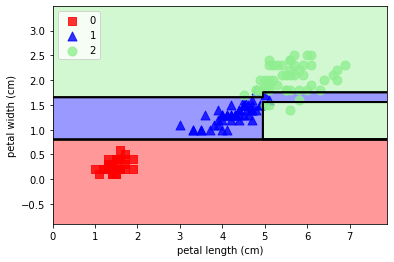

[[50  0  0]
 [ 0 49  1]
 [ 0  1 49]]


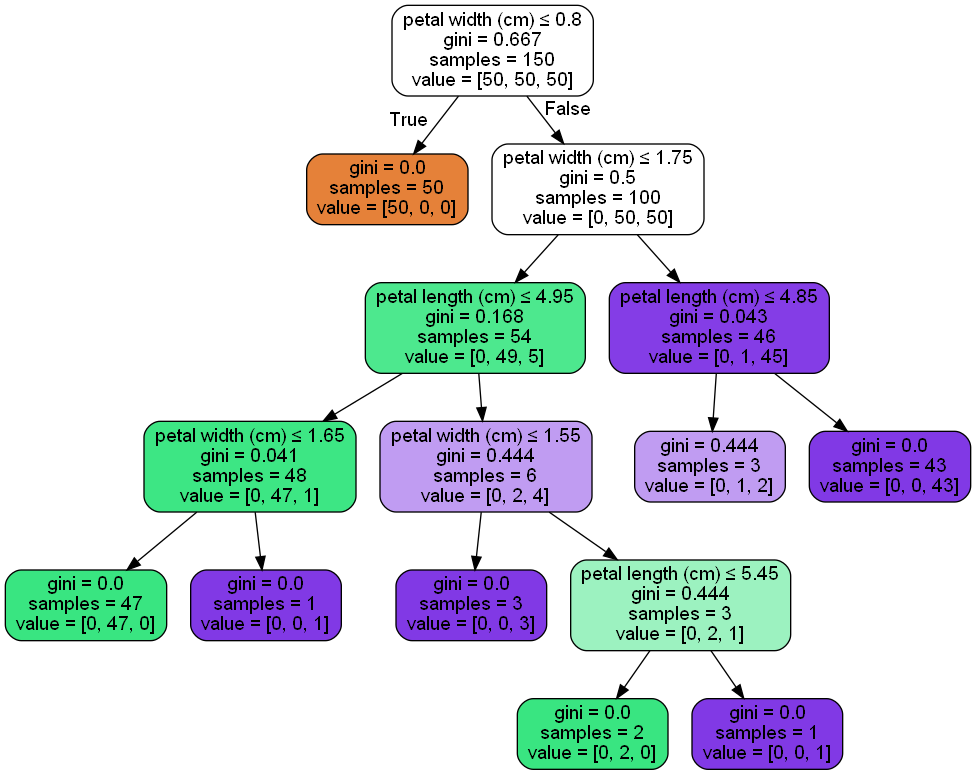

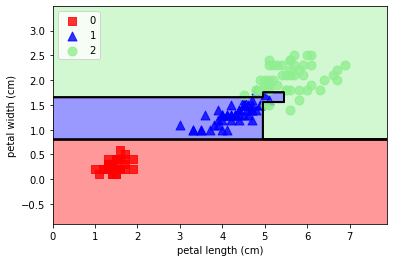

[[50  0  0]
 [ 0 49  1]
 [ 0  0 50]]


In [14]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
import numpy as np

# 가지치기를 1번에서 5번까지 반복
for i in range(1,6):
    plt.figure()
    model = DecisionTreeClassifier(max_depth=i, random_state=0).fit(X,y)
    display(draw_decision_tree(model))
    plot_decision_regions(X, y, model, f"Depth {i}")
    plt.show()
    print(confusion_matrix(y, model.predict(X)))

In [6]:
from sklearn.metrics import classification_report

print(classification_report(y, model.predict(X)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       1.00      0.98      0.99        50
           2       0.98      1.00      0.99        50

    accuracy                           0.99       150
   macro avg       0.99      0.99      0.99       150
weighted avg       0.99      0.99      0.99       150



In [8]:
from sklearn.model_selection import KFold, cross_val_score

cv = KFold(5, shuffle=True, random_state=0)
i = 1
train_scores = []
test_scores = []
for train_index, test_index in cv.split(X,y):
    print(i,'fold')
    X_train, X_test = X[train_index,], X[test_index,]
    y_train, y_test = y[train_index,], y[test_index]
    model = DecisionTreeClassifier(random_state=0)
    model.fit(X_train, y_train)
    score = model.score(X_train, y_train)
    print(score)
    train_scores.append(score)
    score = model.score(X_test, y_test)
    print(score)
    test_scores.append(score)
    i+=1

print('\naverage')
print(np.mean(train_scores))
print(np.mean(test_scores))

model = DecisionTreeClassifier(random_state=0)
cross_val_score(model, X, y, scoring="accuracy", cv=cv).mean()

1 fold
0.9916666666666667
0.9666666666666667
2 fold
0.9916666666666667
0.9
3 fold
0.9916666666666667
1.0
4 fold
0.9916666666666667
0.9333333333333333
5 fold
1.0
0.9333333333333333

average
0.9933333333333334
0.9466666666666667


0.9466666666666667